In [23]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
advanced_df = pd.read_csv("dataset_mood_smartphone (1).csv", index_col=0)

In [25]:
advanced_df.head()

,id,time,variable,value
1,AS14.01,2014-02-26 13:00:00.000,mood,6.0
2,AS14.01,2014-02-26 15:00:00.000,mood,6.0
3,AS14.01,2014-02-26 18:00:00.000,mood,6.0
4,AS14.01,2014-02-26 21:00:00.000,mood,7.0
5,AS14.01,2014-02-27 09:00:00.000,mood,6.0


In [49]:
# Check the shape of a dataframe, along with NaN values
def check_df(df):
    print(df.shape)
    for item in df.columns:
        print(item, ': ', type(df[item]), ', contains NaN:',df[item].isnull().values.any())

# Plot all the variables vs time
def plot_feature(df, variable_name, participant=None):
    ylabel_text = f"{variable_name} value"
    title_text = f"{variable_name} vs time"

    if participant:
        plot = df[(df['variable'] == variable_name) & (df['id'] == participant)]
    else:
        plot = df[(df['variable'] == variable_name)]

    plt.plot(plot['time'], plot['value'])
    plt.xlabel('time')
    plt.ylabel(ylabel_text)
    plt.title(title_text)
    plt.legend(loc='lower right')
    plt.show()

# Plot histograms of all the variables
def plot_histograms(df, variable_name, participant=None):

    if participant:
        df[(df['variable'] == variable_name) & (df['id'] == participant)].plot(kind='hist', edgecolor='black')
    else:
        df[(df['variable'] == variable_name)].plot(kind='hist', edgecolor='black')
    plt.xlabel(variable_name)
    plt.legend(loc='lower right')

# Remove outliers >0.75 and <0.25 of all values
def remove_outliers(df, column_name, multiplier=1.5):
    q1 = df[column_name].quantile(0.25)
    q2 = df[column_name].quantile(0.75)
    iqr = q2 - q1
    lower_bound = q1 - multiplier * iqr
    upper_bound = q2 + multiplier * iqr
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# Compare 2 histograms
def histogram_comparison(df1, df2, variable_name, participant=None):
    if participant:
        plot1 = df1[(df1['variable'] == variable_name) & (df1['id'] == participant)]
        plot2 = df2[(df2['variable'] == variable_name) & (df2['id'] == participant)]
    else:
        plot1 = df1[(df1['variable'] == variable_name)]
        plot2 = df2[(df2['variable'] == variable_name)]
    plt.hist(plot1, label = df1, alpha=0.5, bins = 10, color= ['yellow', 'yellow','yellow', 'yellow'])
    plt.hist(plot2, label = df2, alpha = 0.5, bins = 10, color = ['purple', 'purple','purple', 'purple'])
    plt.legend(loc='lower right')
    plt.xlabel(f"{variable_name} value")
    plt.ylabel('Frequency')
    plt.title('Comparing two histograms')
    plt.show()

## Define functions

## Check for dataframe shape and NaN values

In [27]:
check_df(advanced_df)

(376912, 4)
id :  <class 'pandas.core.series.Series'> , contains NaN: False
time :  <class 'pandas.core.series.Series'> , contains NaN: False
variable :  <class 'pandas.core.series.Series'> , contains NaN: False
value :  <class 'pandas.core.series.Series'> , contains NaN: True


## Drop rows with NaN values

In [28]:
advanced_df.dropna(inplace=True)
check_df(advanced_df)

(376710, 4)
id :  <class 'pandas.core.series.Series'> , contains NaN: False
time :  <class 'pandas.core.series.Series'> , contains NaN: False
variable :  <class 'pandas.core.series.Series'> , contains NaN: False
value :  <class 'pandas.core.series.Series'> , contains NaN: False


## Sort dataframe by id and time

In [29]:
advanced_df = advanced_df.sort_values(['id', 'time'])

## Plot all features vs time for participant AS14.01

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


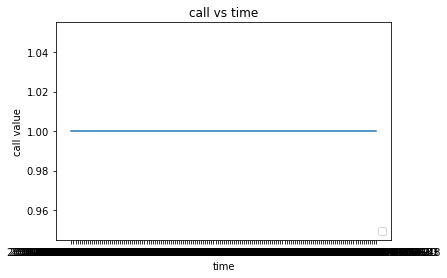

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


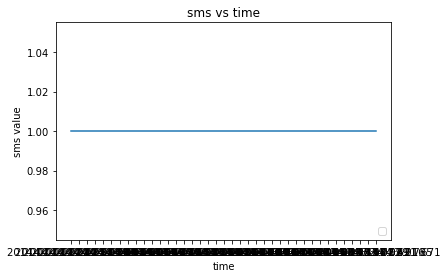

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


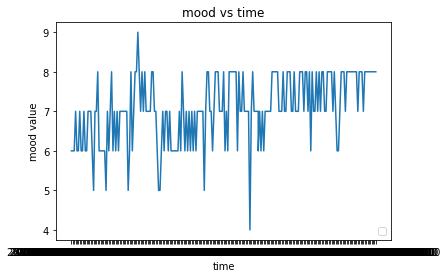

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


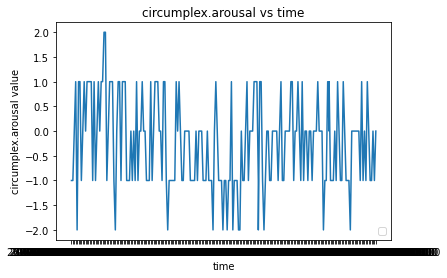

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


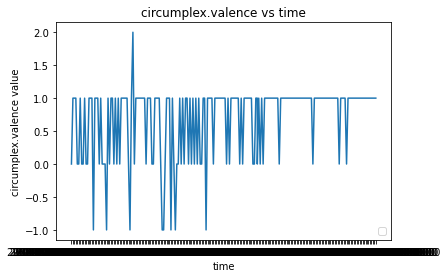

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


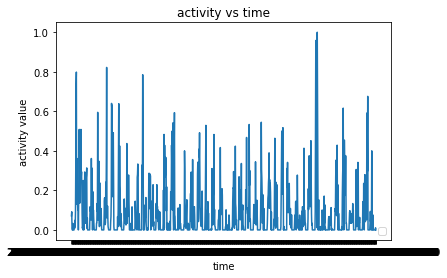

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


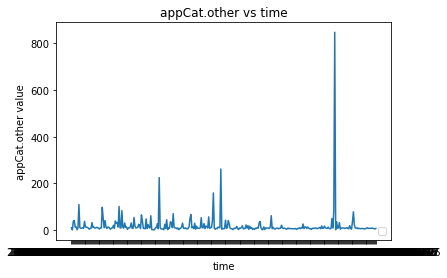

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


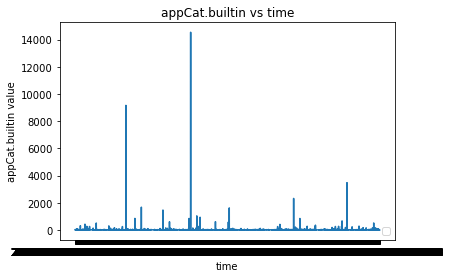

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


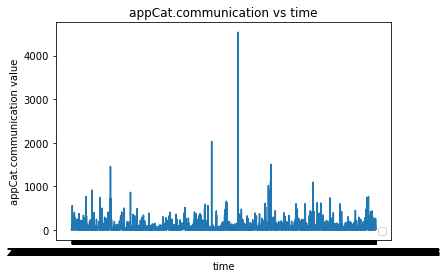

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


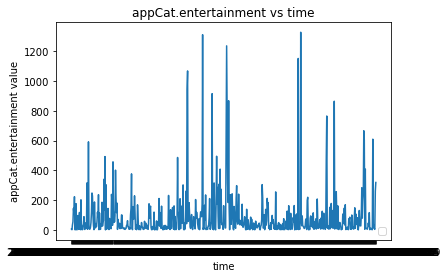

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


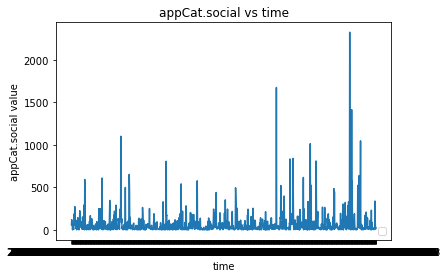

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


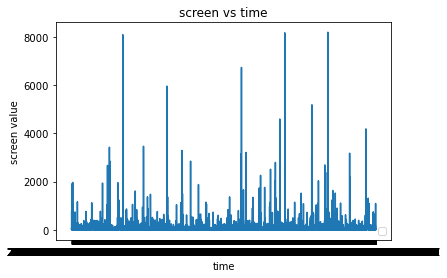

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


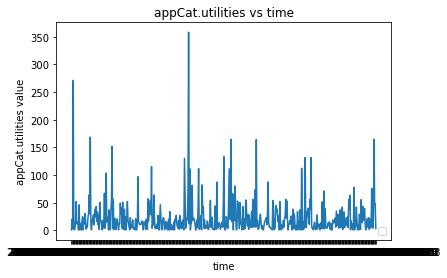

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


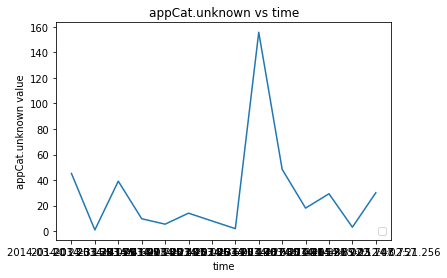

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


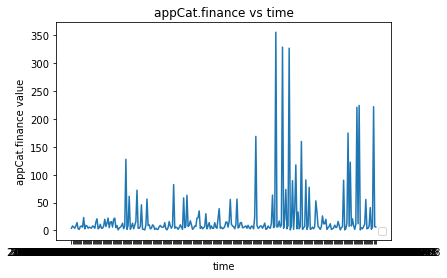

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


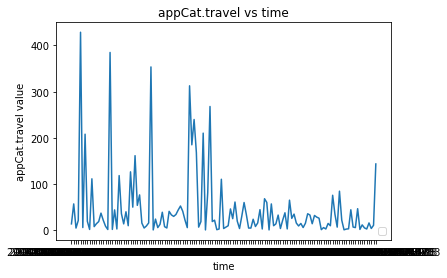

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


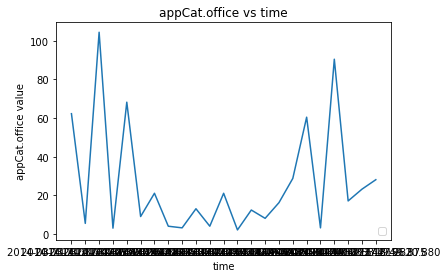

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


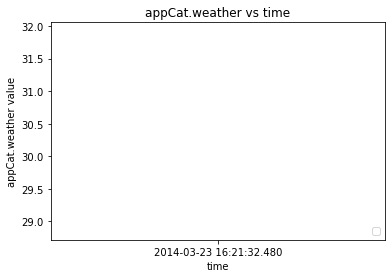

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


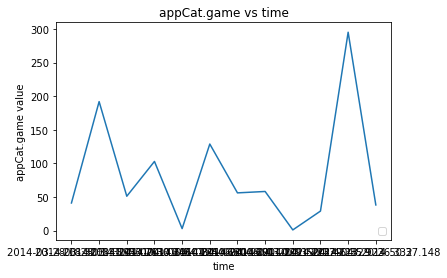

In [39]:
for name in advanced_df['variable'].unique():
    plot_feature(advanced_df, name, 'AS14.01')

## Plot variable values to check for distribution for participant AS14.01

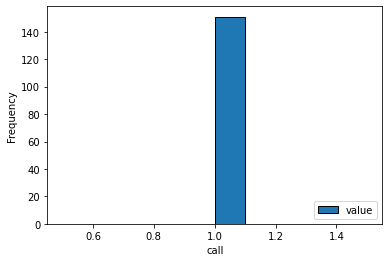

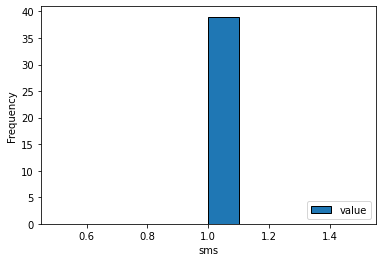

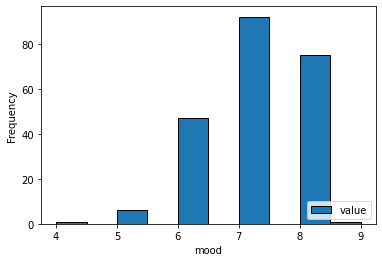

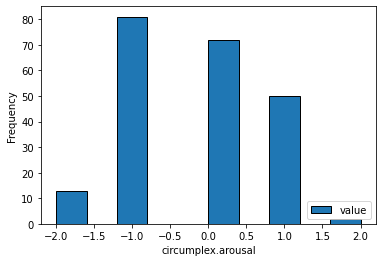

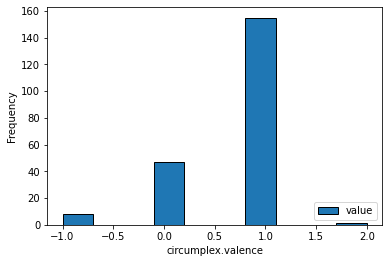

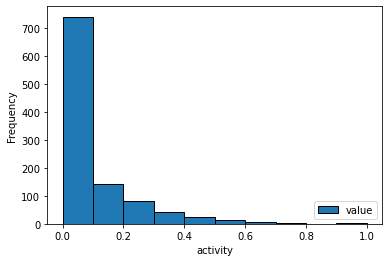

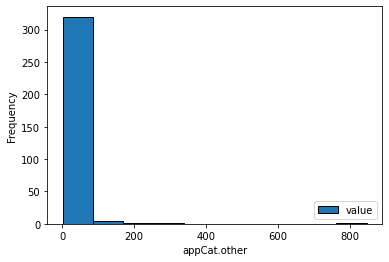

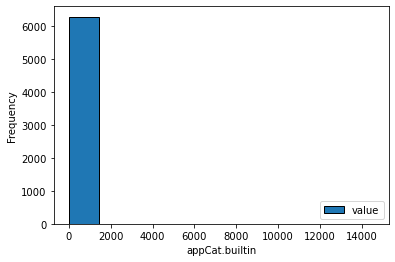

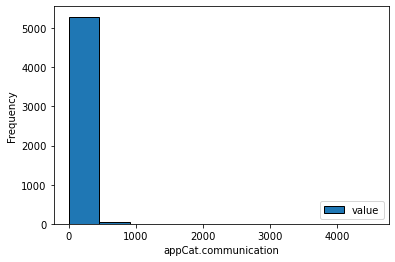

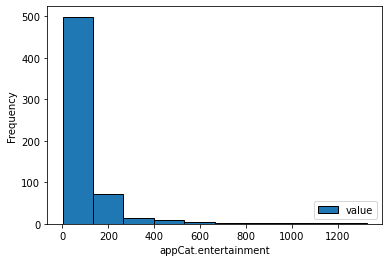

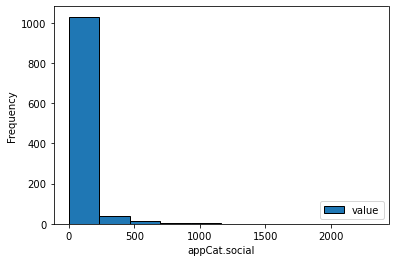

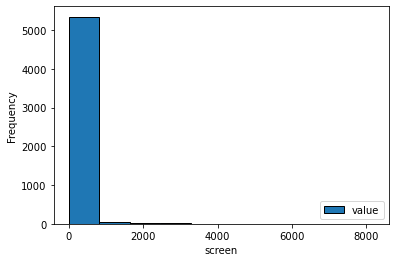

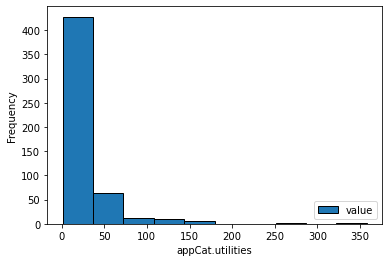

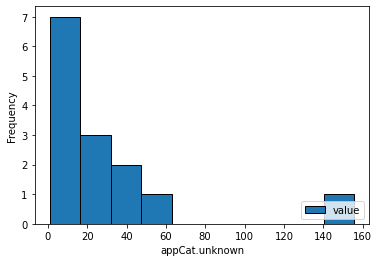

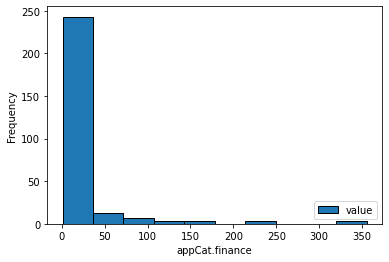

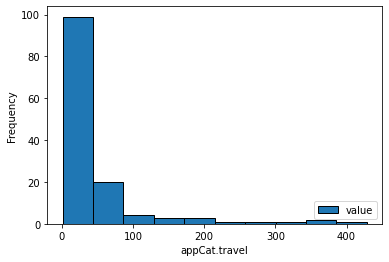

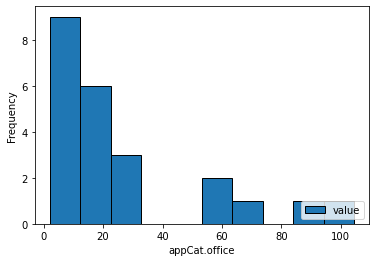

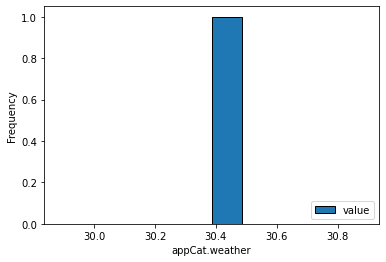

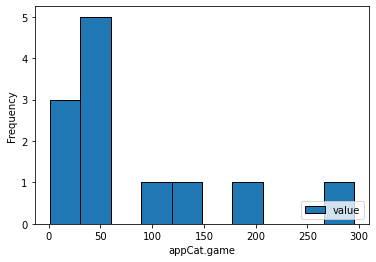

In [40]:
for name in advanced_df['variable'].unique():
    plot_histograms(advanced_df, name, 'AS14.01')

## Calculate mean and sd for each variable

In [32]:
result = advanced_df.groupby('variable')['value'].agg(['mean', 'std'])

## Remove outliers for all participants

In [33]:
filtered_data = []
for name in advanced_df['variable'].unique():
    group = advanced_df[advanced_df['variable'] == name]
    filtered_group = remove_outliers(group, 'value')
    filtered_data.append(filtered_group)

clean_df = pd.concat(filtered_data)

## Check variable distribution for participant AS14.01 with the new data

AS14.01


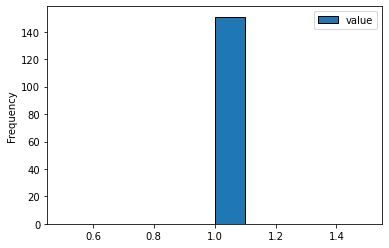

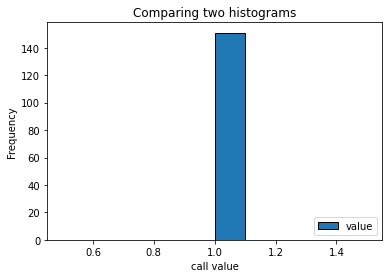

AS14.01


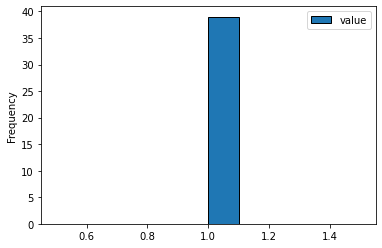

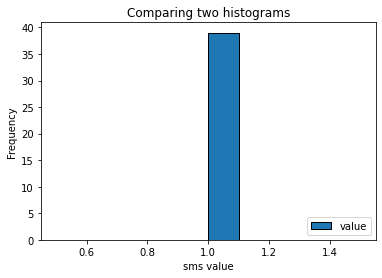

AS14.01


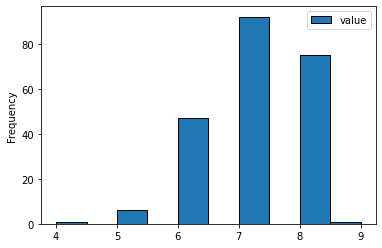

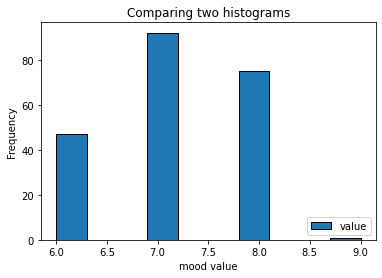

AS14.01


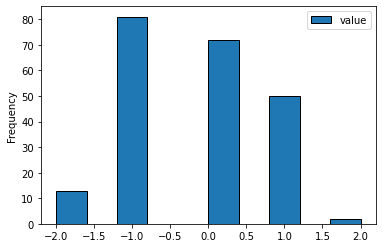

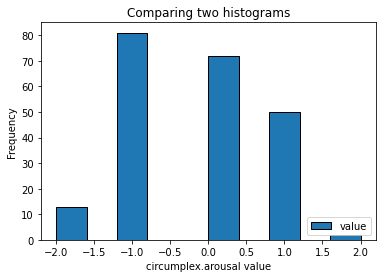

AS14.01


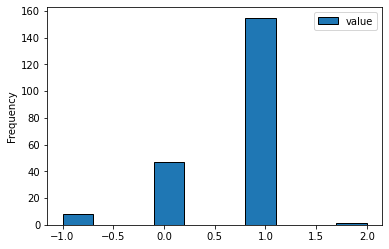

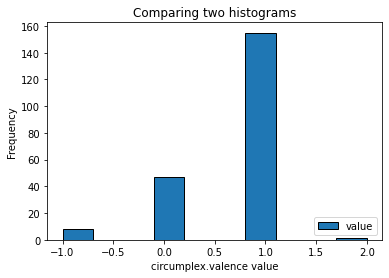

AS14.01


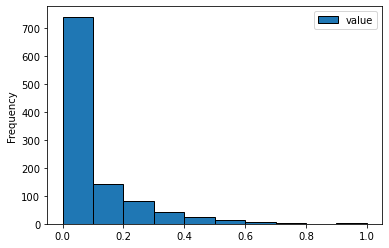

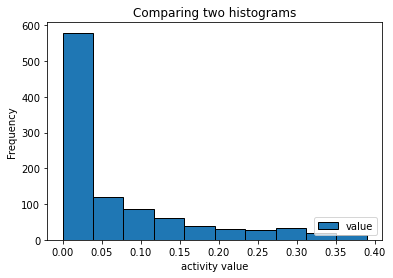

AS14.01


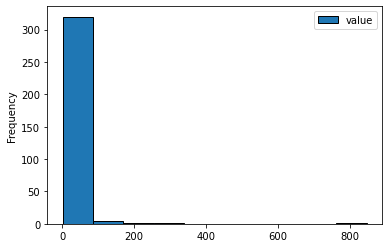

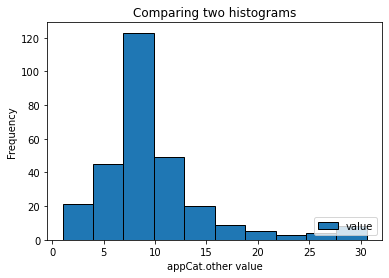

AS14.01


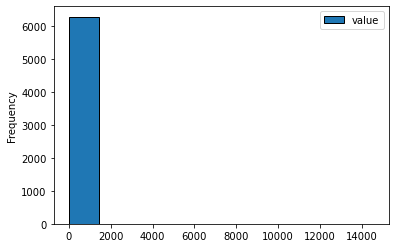

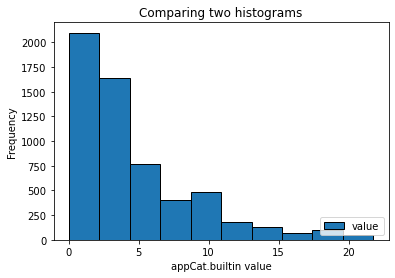

AS14.01


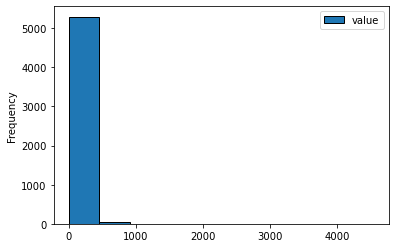

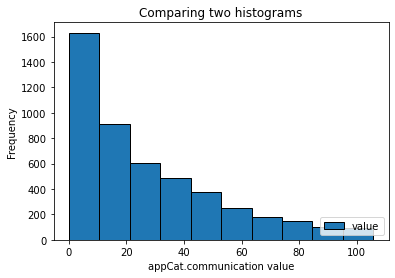

AS14.01


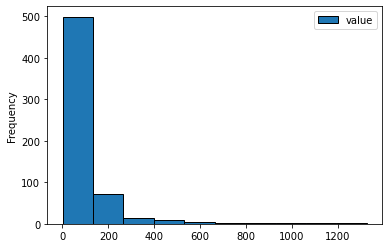

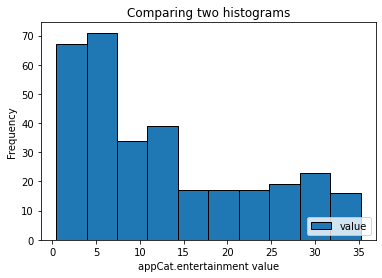

AS14.01


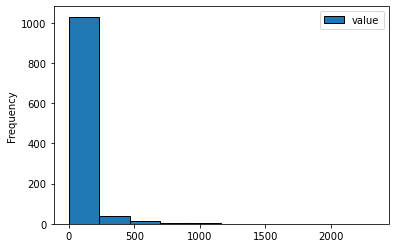

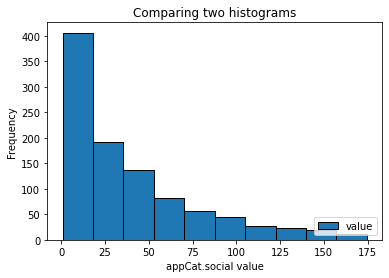

AS14.01


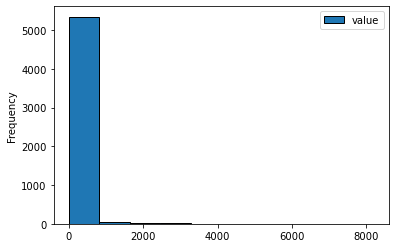

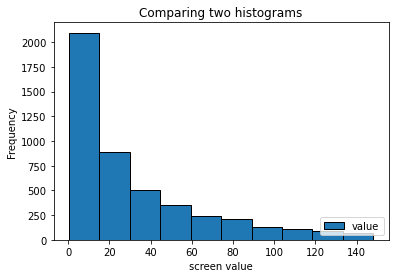

AS14.01


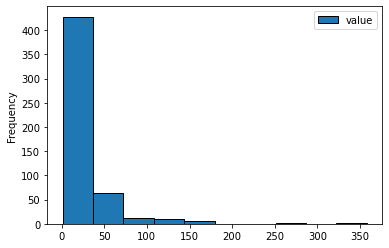

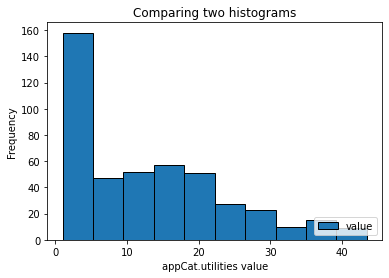

AS14.01


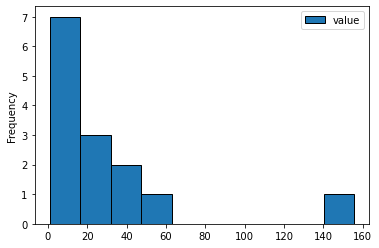

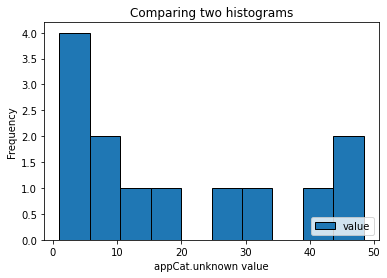

AS14.01


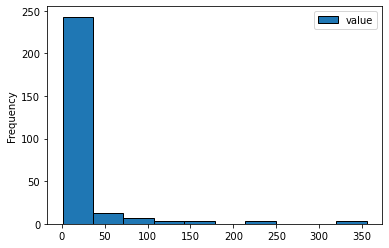

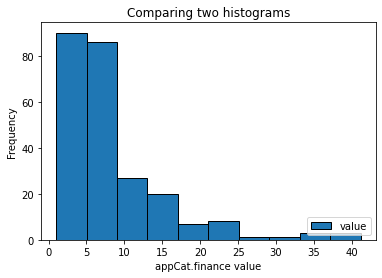

AS14.01


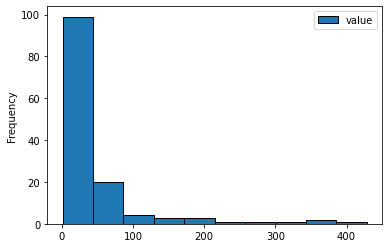

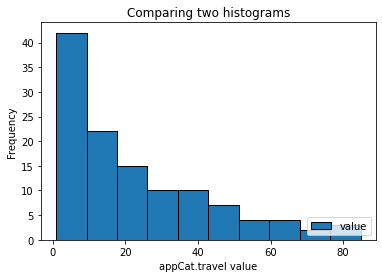

AS14.01


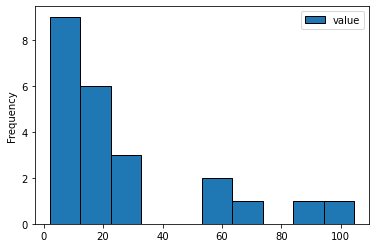

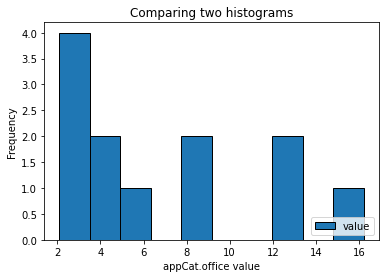

AS14.01


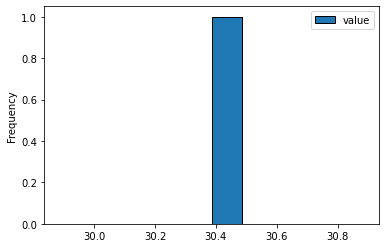

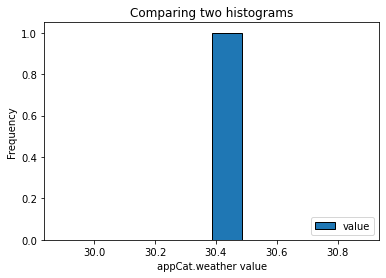

AS14.01


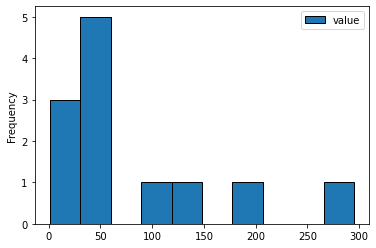

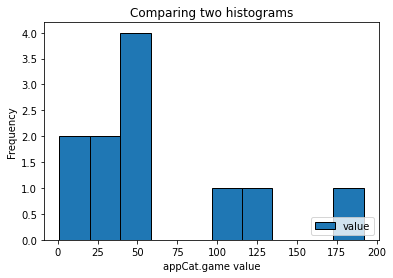

In [50]:
for name in clean_df['variable'].unique():
    histogram_comparison(advanced_df, clean_df, name, 'AS14.01')

# Data engineering

## For each variable, calculate the average value for each day

## Composition of dates(timestamp from hourly to daily)